In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
GDP1=pd.read_excel(r"C:\Users\iT HOME\PycharmProjects\GDP project file\GDP after dummies.xlsx")
GDP1.head()

,Unnamed: 0,Population,Area (sq. km.),Pop. Density (per sq. km.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),...,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE,Country_id
0,0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,...,0,0,0,0,0,0,0,0,0,0
1,1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,...,0,1,0,0,0,0,0,0,0,1
2,2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,...,0,0,0,0,1,0,0,0,0,2
3,3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,...,0,0,0,0,0,0,1,0,0,3
4,4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,...,0,0,0,0,0,0,0,0,1,4


In [ ]:
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    
    return mae, mse, rmse, r2_square

In [4]:
y = GDP1['GDP ($ per capita)']
X = GDP1.drop(['GDP ($ per capita)'], axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101,shuffle=True)

In [6]:
las1 = Lasso(alpha=1)
las1.fit(X_train,y_train)

C:\Users\iT HOME\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1800167911.853646, tolerance: 1895978.7845303863
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

In [7]:
las1_pred = las1.predict(X_test)
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=las1_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,-44.738319
54,31100.000000,28967.539868
185,13300.000000,9410.538544
80,20000.000000,15945.043394
33,600.000000,-1971.945763
201,7400.000000,8247.431052
37,1400.000000,6068.368819
218,4800.000000,6945.070608
199,1000.000000,-2001.869096
66,22000.000000,23341.657508


In [8]:
print('lasso regresssion Performance:')

print('\nall features, No scaling:')
accuracy=las1.score(X_test,y_test)
train=las1.score(X_train,y_train) 
results_df = pd.DataFrame(data=[["lasso Regression perfromance",*evaluate(y_test, las1_pred) ,train,accuracy]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Train_Accuracy","Test_Accuracy"])
result_df=results_df
results_df

lasso regresssion Performance:

all features, No scaling:


,Model,MAE,MSE,RMSE,R2 Square,Train_Accuracy,Test_Accuracy
0,lasso Regression perfromance,3403.484454,2.256075e+07,4749.815418,0.723639,0.810769,0.723639


[-4.43789692e+00 -7.39953515e-06  6.22089868e-04 -3.31872907e-01
 -2.60151851e+00  2.80082323e+02 -6.75140906e+00  1.39719700e+01
  2.21706689e+01 -3.53355516e+01 -6.46285436e+01 -1.11622359e+01
  3.97120022e+02 -1.11886905e+02  2.26916205e+01 -8.39506225e+03
 -0.00000000e+00  2.47196446e+03  9.18232481e+02 -2.02610407e+03
 -4.25775281e+03 -2.90030501e+03 -2.62477432e+03 -0.00000000e+00
 -1.11046919e+03  1.16179056e+03  4.70821597e+02  3.49055387e+02
  7.12057793e+03  1.57769747e+00]


<AxesSubplot:>

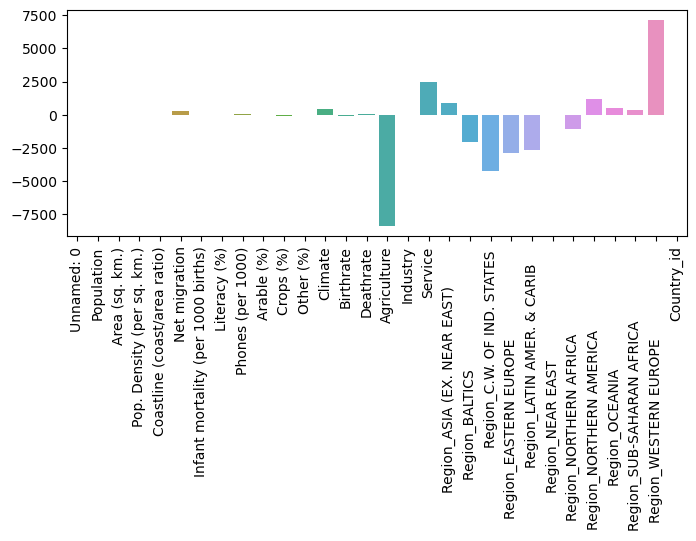

In [9]:
fi=np.array(las1.coef_)
print(fi)
plt.figure(figsize=(8,3),dpi=100)
plt.xticks(rotation=90)
sns.barplot(x=X.columns,y=fi)

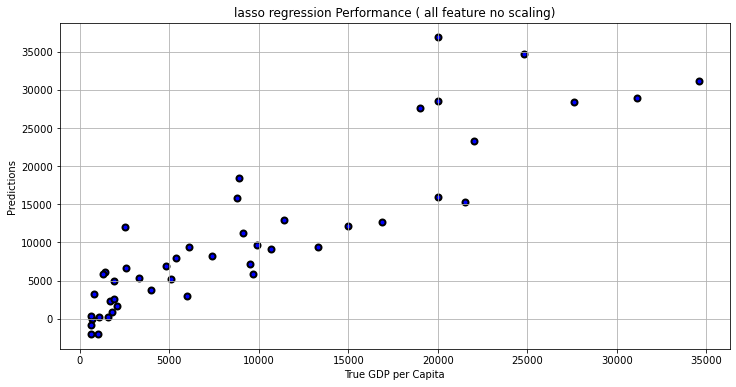

In [10]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,las1_pred,color='blue', linewidths=2, edgecolors='black')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('lasso regression Performance ( all feature no scaling)') 
plt.grid()
plt.show()

In [11]:
sc_X = StandardScaler()
X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

In [12]:
las2 = Lasso(alpha=1)
las2.fit(X2_train,y2_train)

C:\Users\iT HOME\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2879559.2880129814, tolerance: 1895978.7845303863
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

In [13]:
las2_pred = las2.predict(X2_test)
dfff = pd.DataFrame(data=y2_test)
df9 = pd.DataFrame(data=las2_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,-1728.322775
54,31100.000000,27391.803872
185,13300.000000,9078.872066
80,20000.000000,15628.427971
33,600.000000,-2646.660025
201,7400.000000,7133.114694
37,1400.000000,5757.788616
218,4800.000000,6774.369156
199,1000.000000,-1401.362693
66,22000.000000,22048.388402


In [14]:
print('lasso regresssion Performance:')
print('\nall features, with scaling:')
accuracy=las2.score(X2_test,y2_test)
train=las2.score(X2_train,y2_train) 
results_df = pd.DataFrame(data=[["Lasso Regression perfromance",*evaluate(y2_test, las2_pred) ,train,accuracy]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Train_Accuracy","Test_Accuracy"])
result_df=results_df
results_df

lasso regresssion Performance:

all features, with scaling:


,Model,MAE,MSE,RMSE,R2 Square,Train_Accuracy,Test_Accuracy
0,Lasso Regression perfromance,3210.485223,1.702469e+07,4126.098507,0.791453,0.810781,0.791453


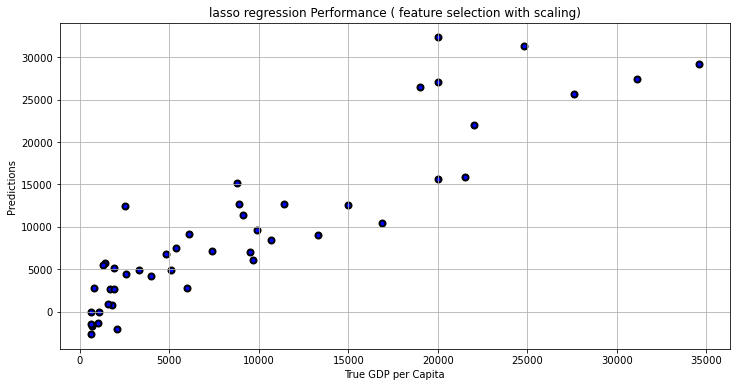

In [15]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y2_test,las2_pred,color='blue', linewidths=2, edgecolors='black')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('lasso regression Performance ( feature selection with scaling)') 
plt.grid()
plt.show()

In [16]:
y3 = y
X3 = GDP1.drop(['GDP ($ per capita)','Population', 'Area (sq. km.)', 'Arable (%)','Crops (%)',
                        'Climate',"Agriculture"], axis=1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101,shuffle=True)

In [17]:
las3 = Lasso(alpha=1)
las3.fit(X3_train,y3_train)

C:\Users\iT HOME\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12017492.09153366, tolerance: 1895978.7845303863
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

In [18]:
las3_pred = las3.predict(X3_test)
dfff = pd.DataFrame(data=y3_test)
df9 = pd.DataFrame(data=las3_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,-54.659815
54,31100.000000,27971.135806
185,13300.000000,9023.193337
80,20000.000000,17442.620170
33,600.000000,-2041.115874
201,7400.000000,7586.594078
37,1400.000000,5686.111517
218,4800.000000,6812.341181
199,1000.000000,-1736.576491
66,22000.000000,24597.430294


In [19]:
print('lasso regresssion Performance:')
print('\nselected features, No scaling:')
accuracy=las3.score(X3_test,y3_test)
train=las3.score(X3_train,y3_train) 
results_df = pd.DataFrame(data=[["Linear Regression perfromance",*evaluate(y_test, las3_pred) ,train,accuracy]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Train_Accuracy","Test_Accuracy"])
result_df=results_df
results_df

lasso regresssion Performance:

selected features, No scaling:


,Model,MAE,MSE,RMSE,R2 Square,Train_Accuracy,Test_Accuracy
0,Linear Regression perfromance,2952.320908,1.658132e+07,4072.017145,0.796885,0.80444,0.796885


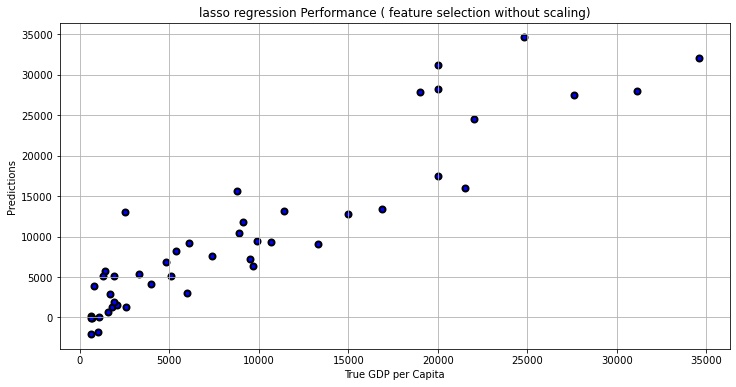

In [20]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,las3_pred,color='blue', linewidths=2, edgecolors='black')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('lasso regression Performance ( feature selection without scaling)') 
plt.grid()
plt.show()

In [21]:
sc_X4 = StandardScaler()
X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)
y4_train = y3_train
y4_test = y3_test

In [22]:
las4 = Lasso(alpha=1)
las4.fit(X4_train,y4_train)

Lasso(alpha=1)

In [23]:
las4_pred = las4.predict(X4_test)
dfff = pd.DataFrame(data=y4_test)
df9 = pd.DataFrame(data=las4_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,-453.391351
54,31100.000000,26976.423766
185,13300.000000,8976.915746
80,20000.000000,17115.507601
33,600.000000,-2659.035697
201,7400.000000,7739.819712
37,1400.000000,5024.086131
218,4800.000000,6948.672014
199,1000.000000,-1502.887162
66,22000.000000,22585.171245


In [24]:
print('lasso regresssion Performance:')
print('\nselected features, with scaling:')
accuracy=las4.score(X4_test,y4_test)
train=las4.score(X4_train,y4_train) 
results_df = pd.DataFrame(data=[["laso Regression perfromance",*evaluate(y_test, las4_pred) ,train,accuracy]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Train_Accuracy","Test_Accuracy"])
result_df=results_df
results_df

lasso regresssion Performance:

selected features, with scaling:


,Model,MAE,MSE,RMSE,R2 Square,Train_Accuracy,Test_Accuracy
0,laso Regression perfromance,2891.211363,1.407774e+07,3752.031895,0.827553,0.804448,0.827553


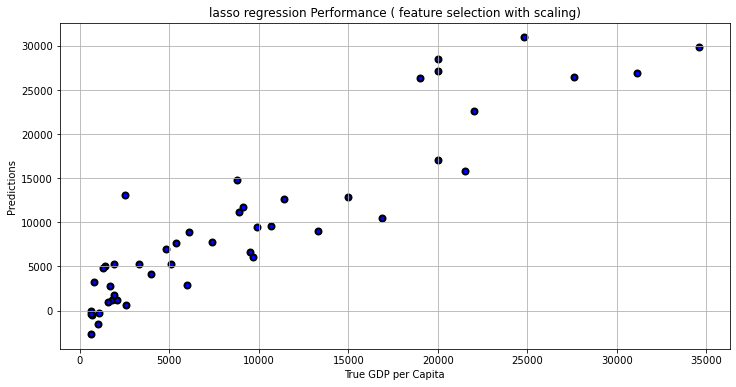

In [25]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,las4_pred,color='blue', linewidths=2, edgecolors='black')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('lasso regression Performance ( feature selection with scaling)') 
plt.grid()
plt.show()